<a href="https://colab.research.google.com/github/bhushanyadav07/PredictHeartDisease/blob/master/Heartdiesese.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset --->[link text](https://www.kaggle.com/ronitf/heart-disease-uci)

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.set(style="darkgrid")

In [92]:
df = pd.read_csv('/content/heart_disease_data.csv')
print(df.shape)
df.head()

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [0]:
# To show the all columns
#EDA
pd.set_option("display.max_columns", 2000) #we take here any value more than data features
pd.set_option("display.max_rows", 100)

In [94]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


****1.age in years
2.sex(1 = male; 0 = female)
3.cpchest pain type
4.trestbpsresting blood pressure (in mm Hg on admission to the hospital)
5.cholserum cholestoral in mg/dl
6.fbs(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7.restecgresting electrocardiographic results
8.thalachmaximum heart rate achieved
9.exangexercise induced angina (1 = yes; 0 = no)
10.oldpeakST depression induced by exercise relative to rest
11.slopethe slope of the peak exercise ST segment
12.canumber of major vessels (0-3) colored by flourosopy
13.thal3 = normal; 6 = fixed defect; 7 = reversable defect
14.target1 or 0 ****

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


##Feature Engineering :)

Let's check the Missing values value present in the dataset

In [96]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

As we can see above there is 0 missing values present in the dataset

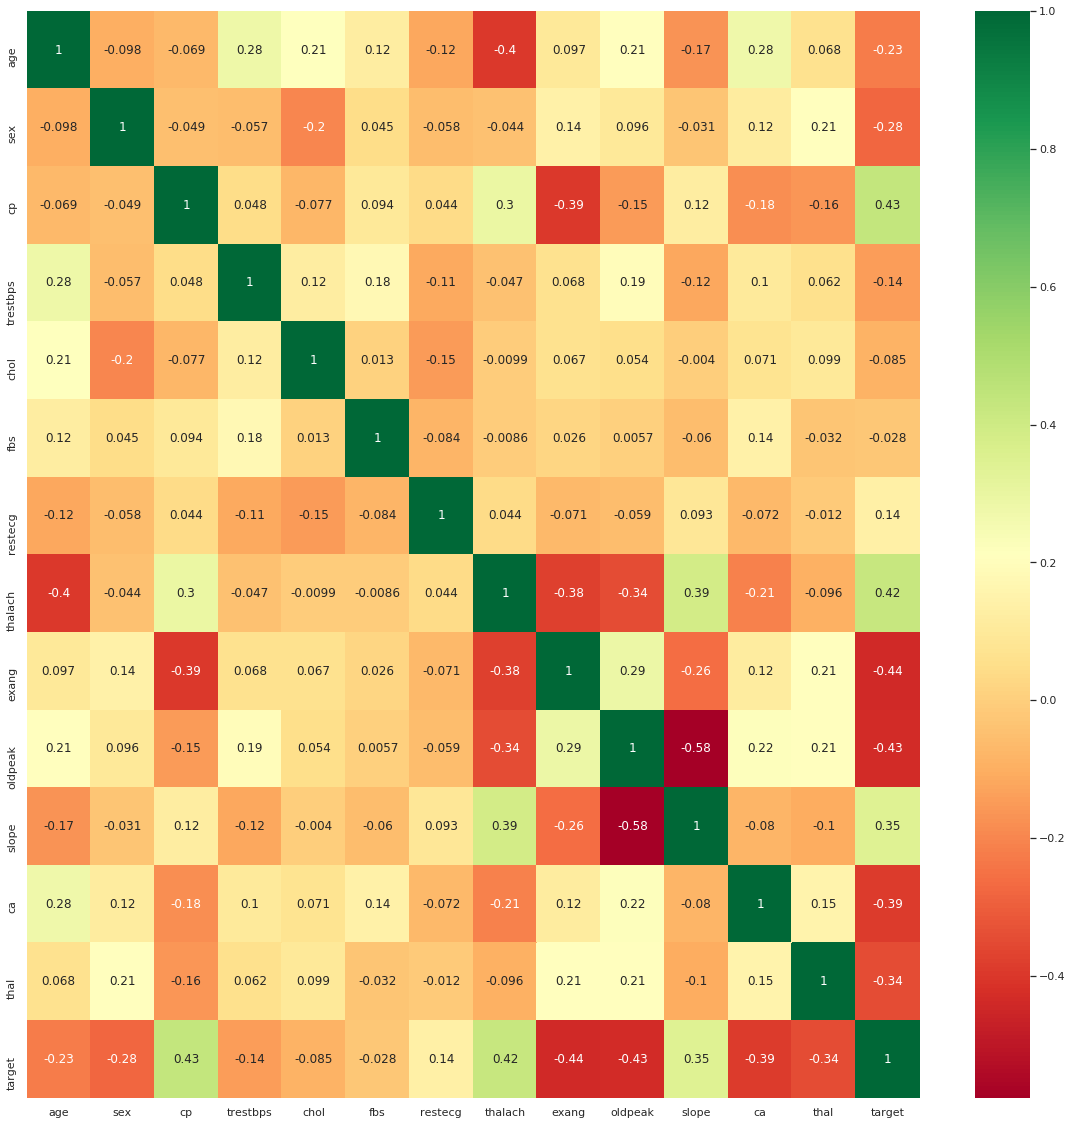

In [97]:
#get correlation of each feature preent in the dataset
corr_mat = df.corr()
corr = corr_mat.index
plt.figure(figsize=(20, 20))
sns.heatmap(df[corr].corr(), annot = True, cmap="RdYlGn") #plotting the heatmap

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f965b5289e8>,
      dtype=object)

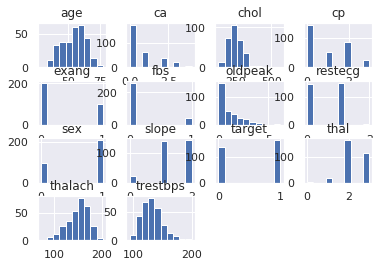

In [98]:
df.hist()

In [99]:
#checking the values in Target features
df_target = df['target'].value_counts()
print(df_target)
print("* "*50)

1    165
0    138
Name: target, dtype: int64
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 


There are total 303 datapoints in the that for 1 - 165 values and 0 - 138


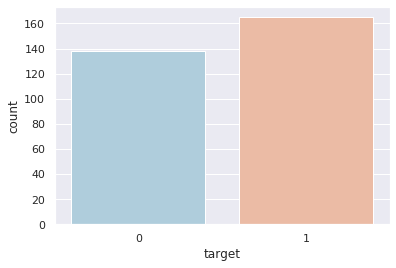

In [100]:
sns.countplot(x = 'target', data = df, palette = 'RdBu_r')

As we can see in the above countplot there are more than 160 person have disease which indicates orange bar and blue bar shows there are more than 130 peoples didn't have any kind of disease.

In [101]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


###Data Pre-processing

In [0]:
#Now we converting all categorical feature which is present in the dataset convert into dummy variable. for that we use fet_dummies() method.
dummy_data = pd.get_dummies(df, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [0]:
#In the dataset many feature has lots of variation in there different units for that we are going for standard scalar
#so what standard scalar does it will rescale all the feature within the same distribution.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
std_ = StandardScaler()
vari_fea_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dummy_data[vari_fea_to_scale] = StandardScaler().fit_transform(dummy_data[vari_fea_to_scale])

In [104]:
dummy_data.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,0,1,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0


Above is all the dummy variable feature each.. based on standaed normal distribution

In [0]:
y = dummy_data['target']
X = dummy_data.drop(['target'], axis = 1)

##KNN Algorithm

In [0]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
knn_scores = []
for k in range(1,20):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score = cross_val_score(knn_classifier, X, y, cv=10)
    knn_scores.append(score.mean())

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

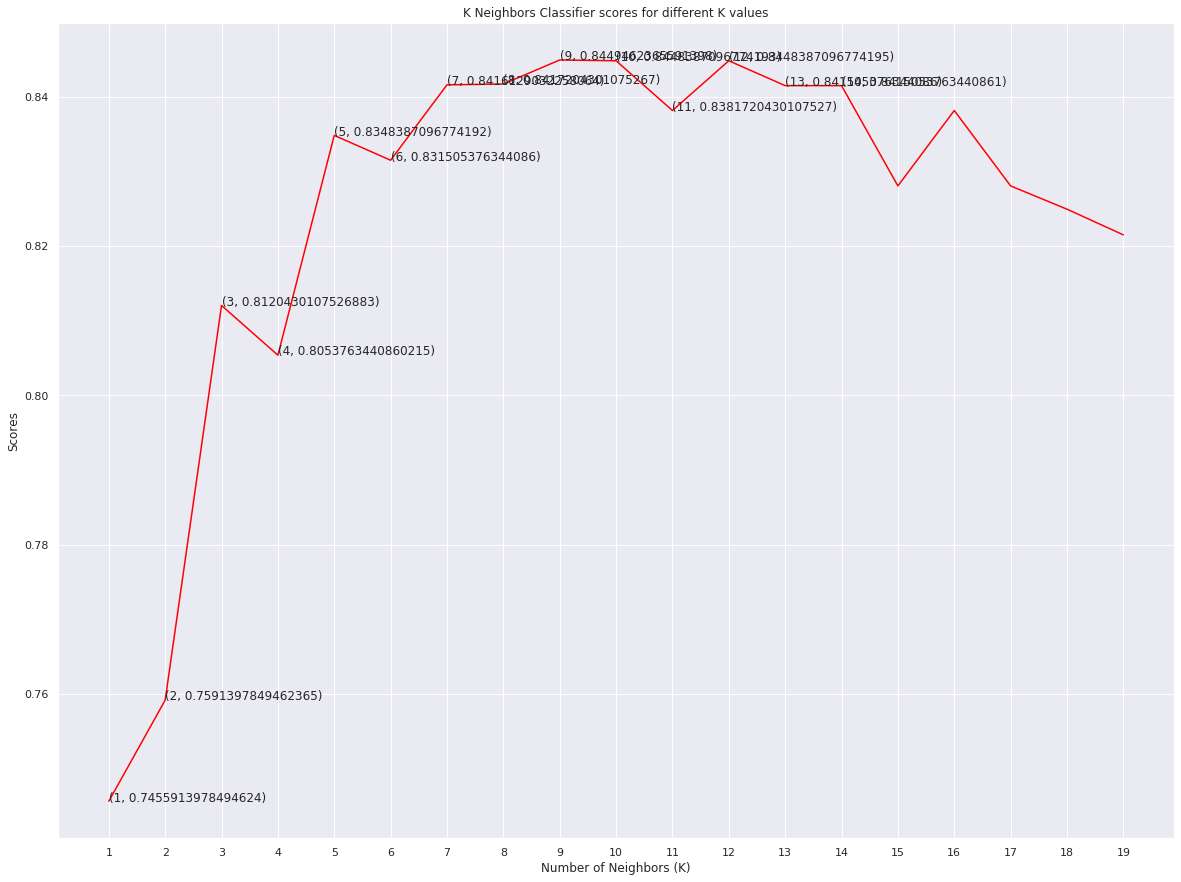

In [107]:
plt.figure(figsize=(20, 15))
plt.plot([k for k in range(1, 20)], knn_scores, color = 'red')
for i in range(1,15):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 20)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')

plt.title('K Neighbors Classifier scores for different K values')

**Observation :**
1. we take 1 to 30 iterations and apply KNN as we can see for the first KNN accuracy which is 1.07455 and likewise for 2KNN acc - 2.0755
2. Lastly for 12th iteration the KNN accuracy is about 85% which very good for K.

In [0]:
knn_classifier = KNeighborsClassifier(n_neighbors = 12)
score = cross_val_score(knn_classifier, X, y, cv=10)

In [109]:
#mean of all 10 CV score 
score.mean()

0.8448387096774195

##Logistic Regression

##Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier
randomforest_classifier= RandomForestClassifier(n_estimators=10)
score=cross_val_score(randomforest_classifier,X,y,cv=10)

In [111]:
score.mean()

0.801505376344086

##Decision Tree

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [113]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion = "gini", random_state =100,max_depth=3, min_samples_leaf=5)
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [114]:
y_predict = model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)

0.6973684210526315

##Logistic Regression

In [115]:
from sklearn import linear_model
clf = linear_model.LogisticRegression(random_state=10, solver='liblinear', penalty='l1', C=0.1)
clf.fit(X_train, y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=10, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [116]:
y_predict = clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)

0.7894736842105263

**Conclusion :**
*From above all accuracy scores, I conclude that is KNN perform very well with highest accuracy 85% than other algorithm*